In [55]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
import numpy as np
import scanpy as sc
from pathlib import Path
import wandb, pprint

In [56]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

fm.fontManager.addfont('/work/magroup/skrieger/Arial.ttf')
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['Arial']

sc.set_figure_params(figsize=(6, 6), frameon=False)
sns.set_theme(style="white")  


# Fixed consistent orders and fixed color palette
fg_order = ["ESM2", "Gene2Vec", "GenePT", "HyenaDNA", "Random"]
fe_order = ["Sorting", "Binning", "Autobin", "Continuous"]

# # Choose any color palette that supports 5 unique colors
# base_palette = sns.color_palette("Set2", 5)
# fg_color_map = {
#     "ESM2": base_palette[0],
#     "Gene2Vec": base_palette[1],
#     "GenePT": base_palette[2],
#     "HyenaDNA": base_palette[3],
#     "Random": base_palette[4]
# }
# Fixed consistent orders and color mapping
fg_order = ["ESM2", "Gene2Vec", "GenePT", "HyenaDNA", "Random"]
fe_order = ["Sorting", "Binning", "Autobin", "Continuous"]
base_palette = sns.color_palette("Set2", 5)
fg_color_map = dict(zip(fg_order, base_palette))

<h2>Panel B</h2>

In [57]:
mcc_scores = {
    "scbert": [0.53539, 0.58376, 0.5755],
    "scgpt": [0.47302, 0.4762, 0.4684],
    "uce":    [0.3595, 0.3451, 0.3544],
    "scfound": [0.48889, 0.4845, 0.4554],
    "geneformer": [0.4675, 0.47669, 0.46669]
}


In [60]:


# Define method order and color palette
method_order = ["scbert", "scgpt", "uce", "scfound", "geneformer"]
base_palette = sns.color_palette("Set2", len(method_order))
custom_color_map = dict(zip(method_order, base_palette))

def plot_mcc_dict(mcc_dict, title="MCC Comparison", save_prefix="mcc_plot"):
    # --- 1. customise the display names here ---
    pretty_name = {
        "scbert":     "scBERT",
        "scgpt":      "scGPT",
        "uce":        "UCE",
        "scfound":    "scFoundation",
        "geneformer": "Geneformer"
    }

    # --- 2. flatten dict into a DataFrame (unchanged) ---
    data = [
        {"method": m, "mcc": s}
        for m, scores in mcc_dict.items()
        for s in scores
    ]
    df = pd.DataFrame(data)

    # --- 3. plot ---
    plt.figure(figsize=(6, 6), facecolor='white')
    ax = sns.barplot(
        data=df,
        x="method",
        y="mcc",
        order=method_order,
        palette=custom_color_map,
        errorbar="sd",
        capsize=0.1,
        err_kws={"color": "black", "linewidth": 1.5}
    )

    # --- 4. replace tick text with pretty labels ---
    ax.set_xticklabels([pretty_name.get(t.get_text(), t.get_text())
                        for t in ax.get_xticklabels()],
                       rotation=0, ha='center')

    ax.set_title(title)
    ax.set_xlabel("")          # keep x-axis title blank
    ax.set_ylabel("MCC")

    plt.tight_layout()
    #plt.savefig(f"/work/magroup/ehaber/{save_prefix}.png", dpi=300, facecolor='white')
    plt.savefig(f"/work/magroup/ehaber/heimdall_fig2/{save_prefix}.pdf", facecolor='white')
    plt.show()



/tmp/ipykernel_2542483/904179395.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_2542483/904179395.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([pretty_name.get(t.get_text(), t.get_text())


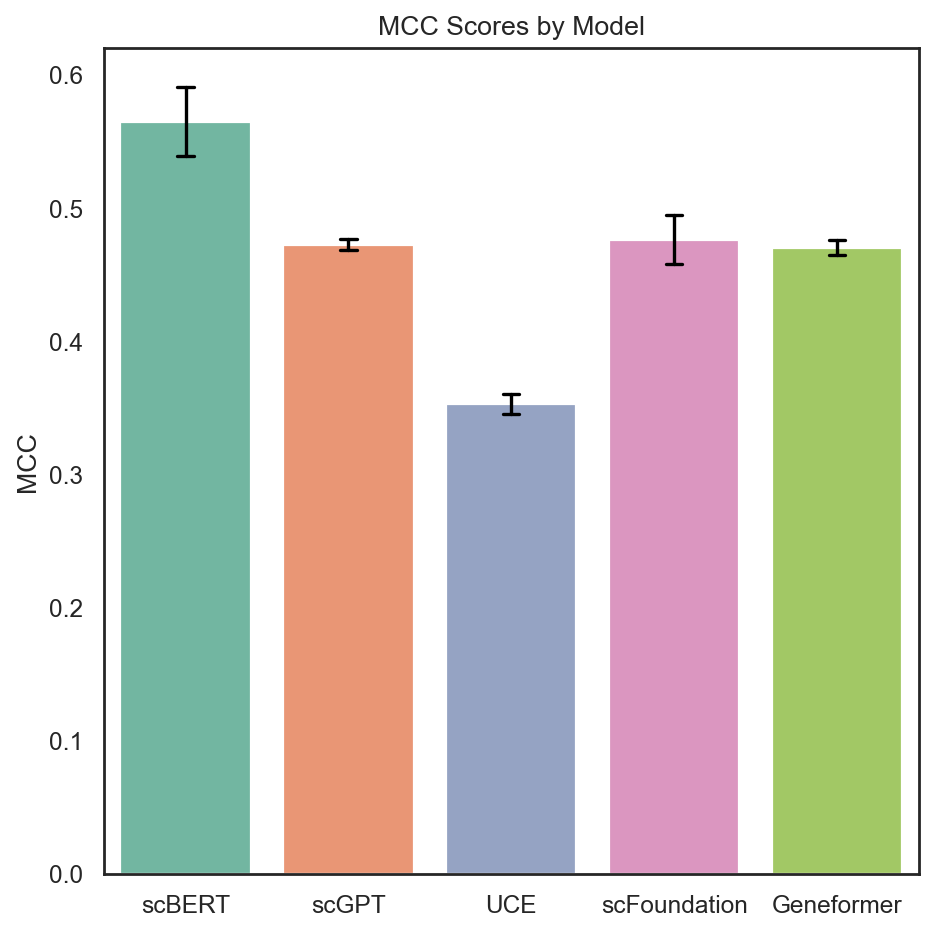

In [61]:
plot_mcc_dict(mcc_scores, title="MCC Scores by Model", save_prefix="panelB")


<h2>Panel C</h2>

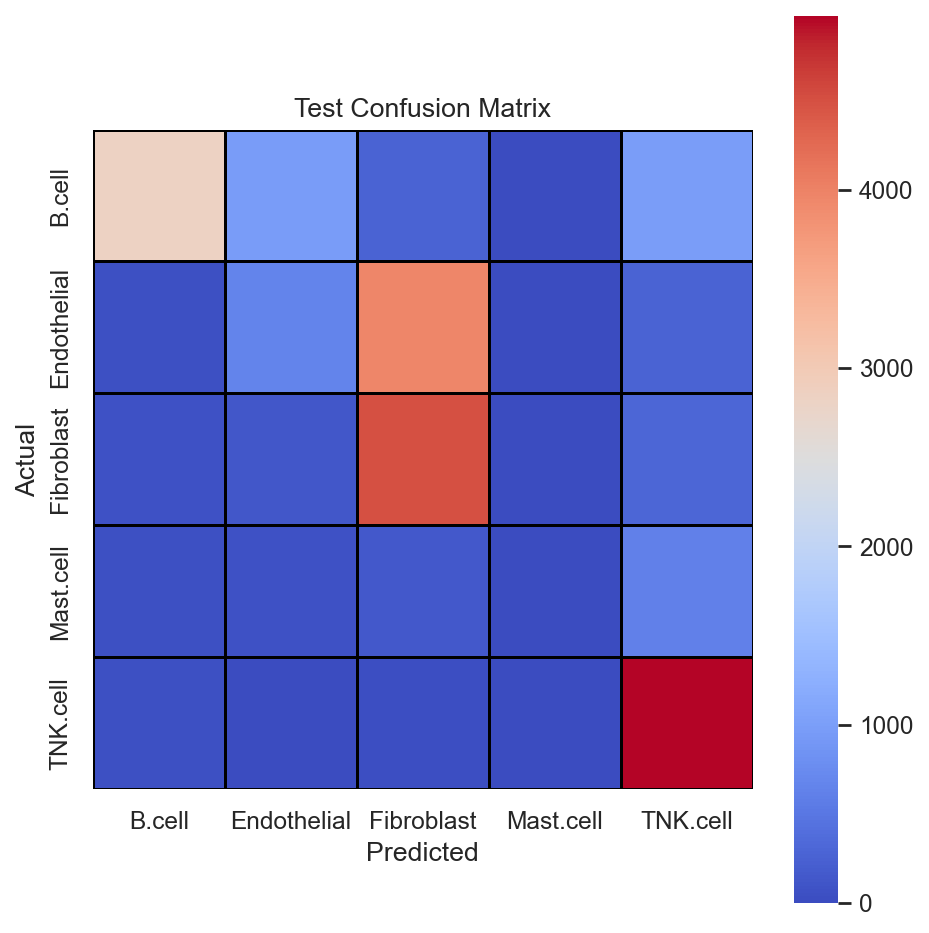

<Figure size 480x480 with 0 Axes>

In [52]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Connect to the run
api = wandb.Api()
run = api.run("Heimdall/scbert_overlap35_runs_prod/runs/mxmtcu01")

# Get confusion matrix metadata from the summary
cm_info = run.summary["test_confusion_matrix_table"]
artifact_file = run.file(cm_info["path"]).download(exist_ok=True)

# Load the JSON file
with open(artifact_file.name, "r") as f:
    table_data = json.load(f)

# Reconstruct DataFrame
columns = table_data["columns"]
data = table_data["data"]
df = pd.DataFrame(data, columns=columns)

# Pivot into square confusion matrix
df_pivot = df.pivot(index="Actual", columns="Predicted", values="nPredictions").fillna(0)

# Plot
plt.figure(figsize=(6, 6))
sns.heatmap(
    df_pivot.values,
    annot=False,
    cmap="coolwarm",
    xticklabels=df_pivot.columns,
    yticklabels=df_pivot.index,
    square=True,
    linewidths=0.5,
    linecolor="black",
    cbar=True
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Test Confusion Matrix")
plt.tight_layout()
plt.show()
plt.savefig("/work/magroup/ehaber/heimdall_fig2/panelC.pdf", format="pdf", bbox_inches="tight")

<h2>Panel D: UMAPs</h2>

/work/magroup/ehaber/newconda/envs/heimdall/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/work/magroup/ehaber/newconda/envs/heimdall/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


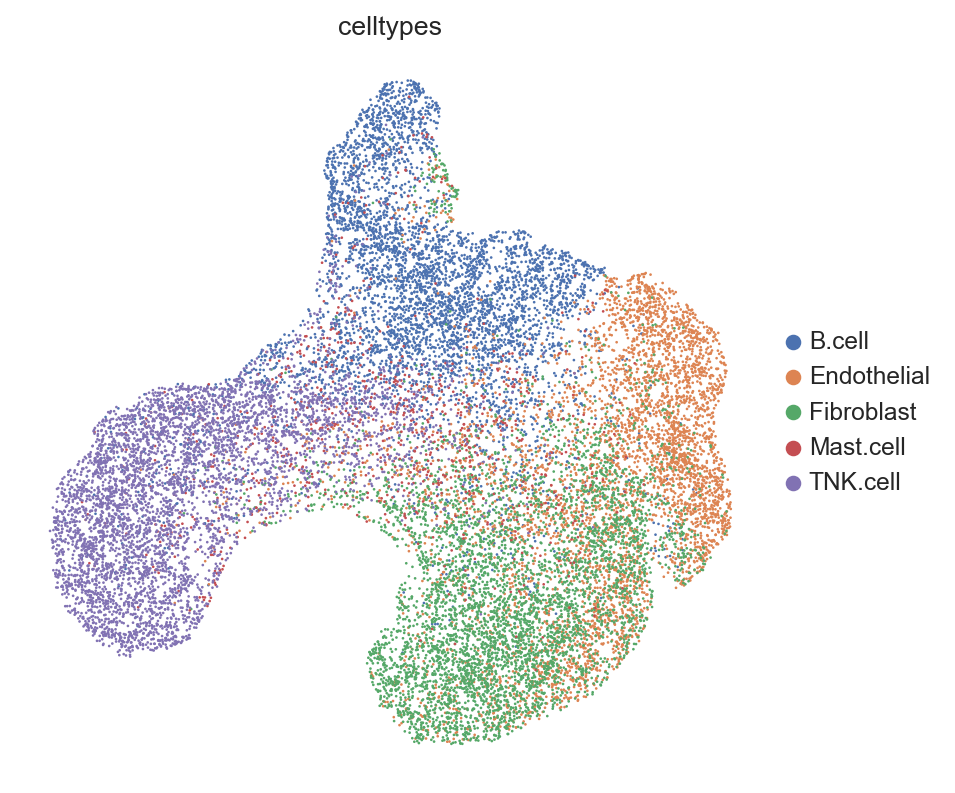

In [47]:
#scbert
test_adata = sc.read_h5ad('/work/magroup/ehaber/Heimdall/scbert_overlap35_umap_results/Heimdall.fg.Gene2VecFg_Heimdall.fe.ScBERTBinningFe_Heimdall.fc.ScGPTFc_ovarian_cancer_pairs_0_1_lr0.001_bz32_seed55_agTrue/test_adata.h5ad')

sc.settings.figdir = "/work/magroup/ehaber/heimdall_fig2"
sc.pl.embedding(
    test_adata,
    basis="umap",  # this accesses obsm["X_umap"]
    color="celltypes",
    show=True,
    save="_scbert.png"
)

/work/magroup/ehaber/newconda/envs/heimdall/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/work/magroup/ehaber/newconda/envs/heimdall/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


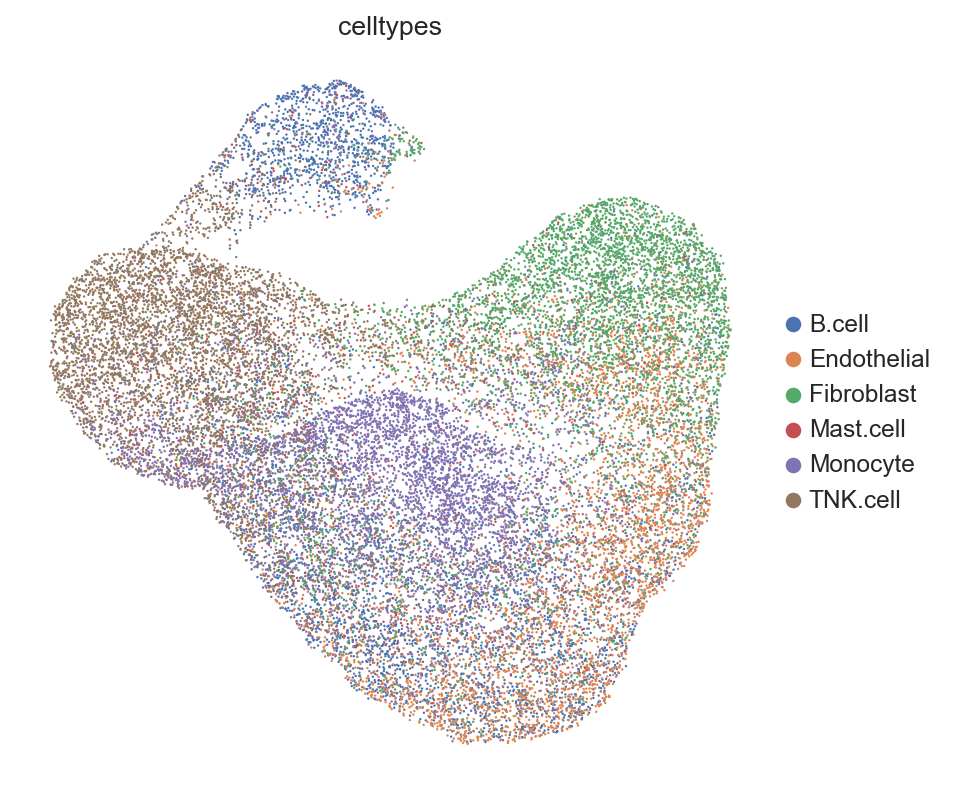

In [48]:
#scfoundation
test_adata = sc.read_h5ad('/work/magroup/ehaber/Heimdall/scfound_overlap35_umap_results/Heimdall.fg.IdentityFg_Heimdall.fe.scfound_Heimdall.fc.ScGPTFc_ovarian_cancer_pairs_0_1_lr0.01_bz32_seed55_agTrue/test_adata.h5ad')

sc.pl.embedding(
    test_adata,
    basis="umap",  # this accesses obsm["X_umap"]
    color="celltypes",
    show=True,
    save="_scfoundation.png"
)

/work/magroup/ehaber/newconda/envs/heimdall/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/work/magroup/ehaber/newconda/envs/heimdall/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


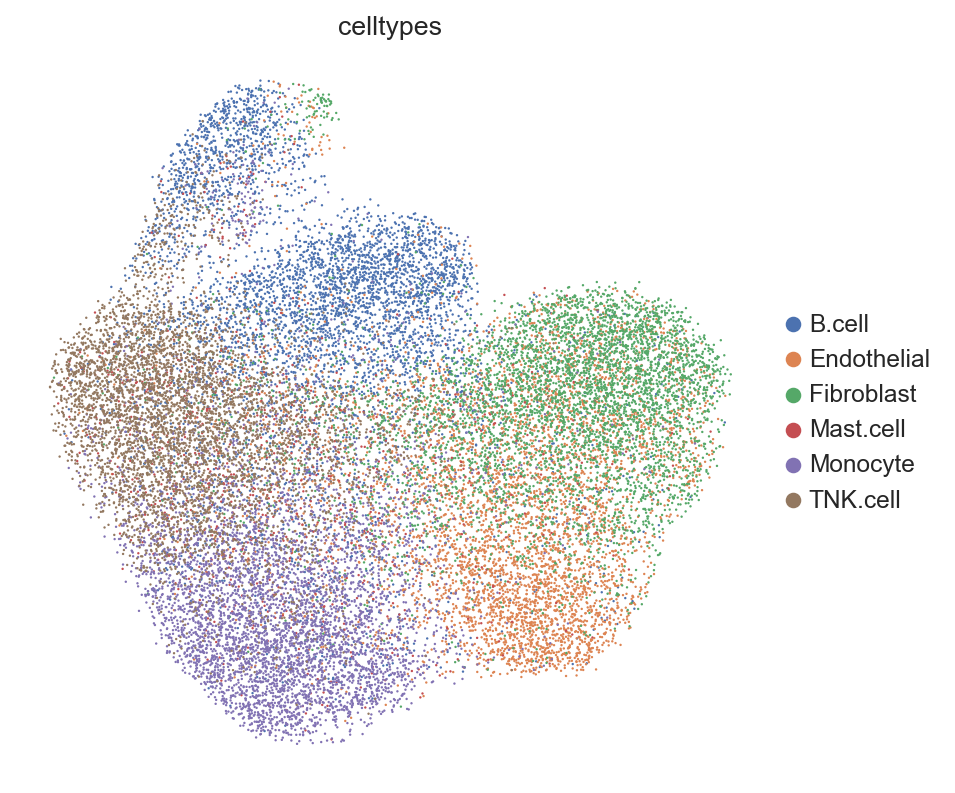

In [49]:
#UCE
test_adata = sc.read_h5ad('/work/magroup/ehaber/Heimdall/uce_overlap35_runs_results/Heimdall.fg.ESM2Fg_Heimdall.fe.WeightedSamplingFe_Heimdall.fc.UCEFc_ovarian_cancer_pairs_0_1_lr0.001_bz64_seed55_agTrue/test_adata.h5ad')

sc.pl.embedding(
    test_adata,
    basis="umap",  # this accesses obsm["X_umap"]
    color="celltypes",
    show=True,
    save="_uce.png"
)

/work/magroup/ehaber/newconda/envs/heimdall/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/work/magroup/ehaber/newconda/envs/heimdall/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


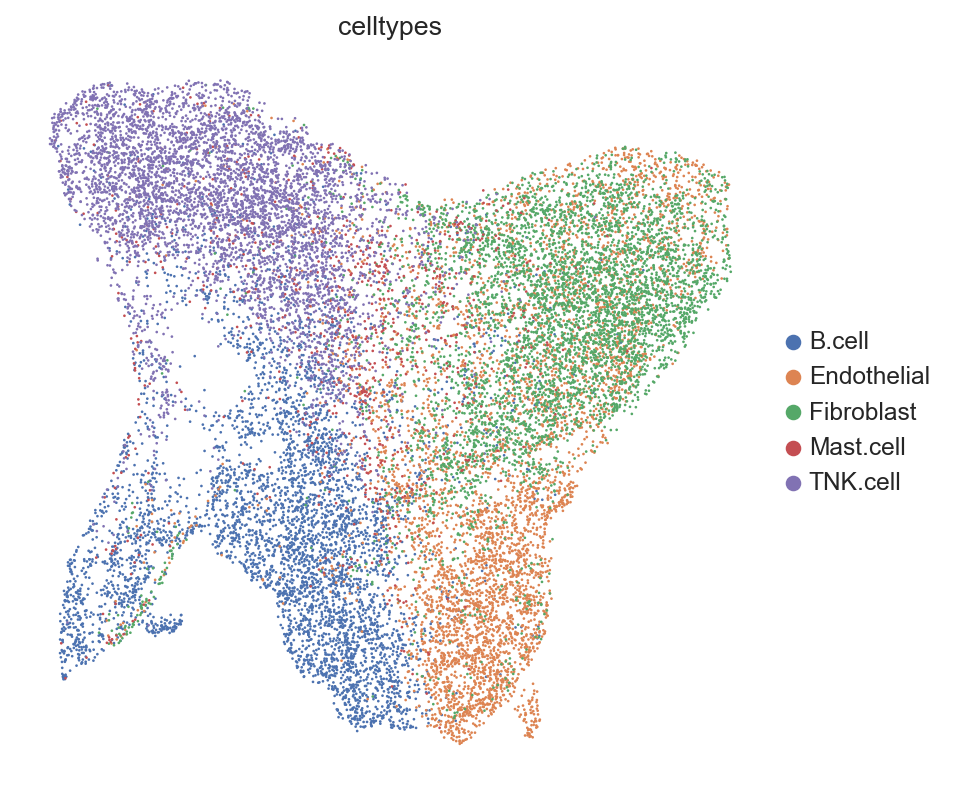

In [50]:
test_adata = sc.read_h5ad('/work/magroup/ehaber/Heimdall/scgpt_overlap35_umap_results/Heimdall.fg.Gene2VecFg_Heimdall.fe.ScBERTBinningFe_Heimdall.fc.ScGPTFc_ovarian_cancer_pairs_0_1_lr0.01_bz32_seed55_agTrue/test_adata.h5ad')

sc.pl.embedding(
    test_adata,
    basis="umap",  # this accesses obsm["X_umap"]
    color="celltypes",
    show=True,
    save='_scgpt.png'
)

/work/magroup/ehaber/newconda/envs/heimdall/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/work/magroup/ehaber/newconda/envs/heimdall/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


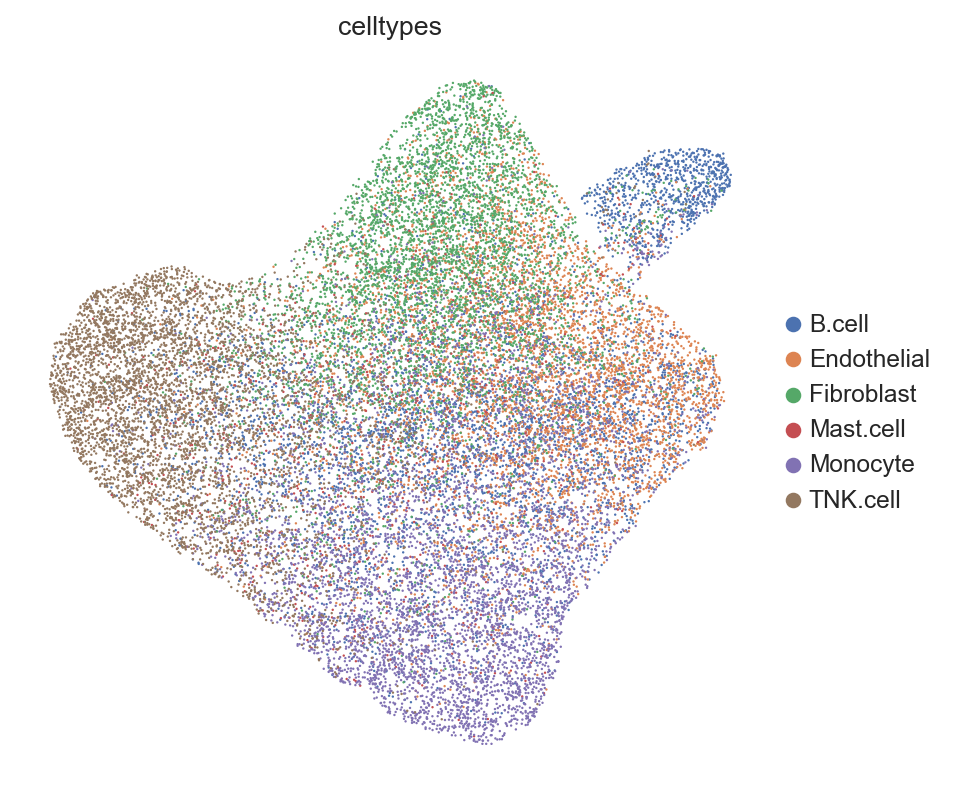

In [51]:
#Geneformer
test_adata = sc.read_h5ad('/work/magroup/ehaber/Heimdall/geneformer_overlap35_umap_results/Heimdall.fg.IdentityFg_Heimdall.fe.SortingFe_Heimdall.fc.GeneformerFc_ovarian_cancer_pairs_0_1_lr0.001_bz32_seed56_agTrue/test_adata.h5ad')

sc.pl.embedding(
    test_adata,
    basis="umap",  # this accesses obsm["X_umap"]
    color="celltypes",
    show=True,
    save='_geneformer.png'
)

<h2>Panel E: Expressed vs All Genes</h2>

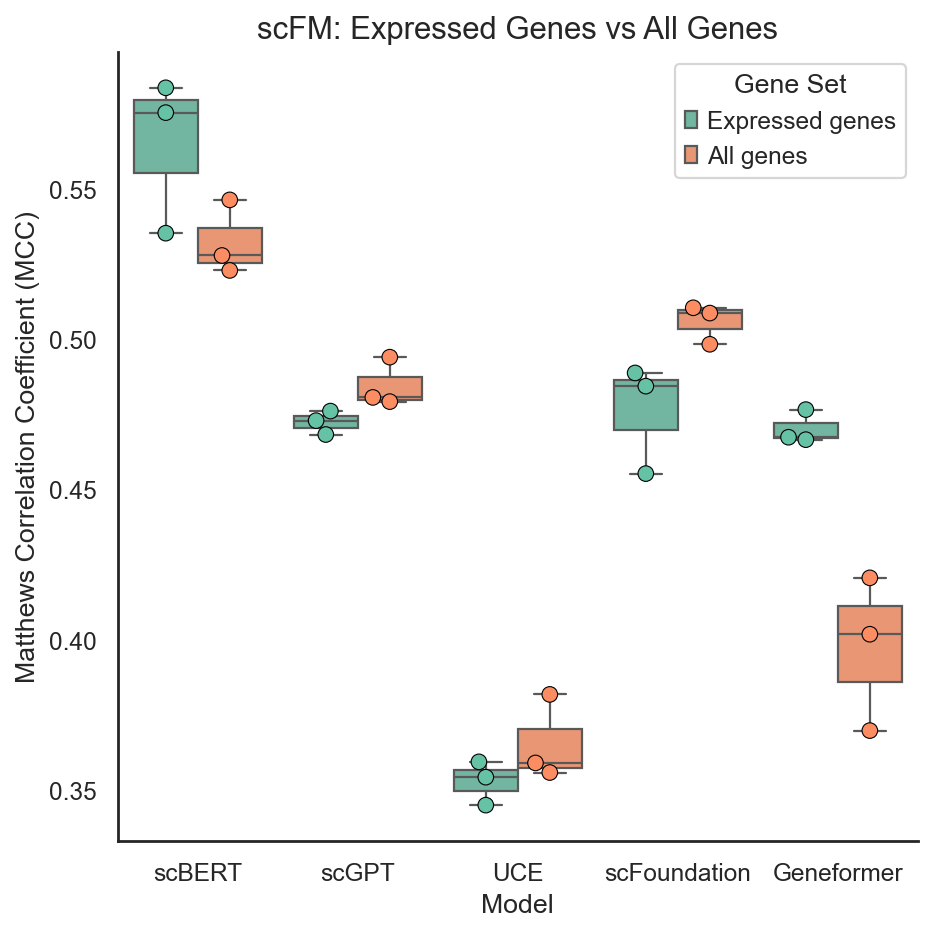

<Figure size 480x480 with 0 Axes>

In [44]:
mcc_results = {
    "scBERT": {
        "Expressed genes": [0.53539, 0.58376, 0.5755],
        "All genes":       [0.523, 0.52797, 0.54647]
    },
    "scGPT": {
        "Expressed genes": [0.47302, 0.4762, 0.4684],
        "All genes":       [0.47935, 0.49414, 0.48075]
    },
    "UCE": {
        "Expressed genes": [0.3595, 0.3451, 0.3544],
        "All genes":       [0.35595, 0.35914, 0.38194]
    },
    "scFoundation": {
        "Expressed genes": [0.48889, 0.4845, 0.4554],
        "All genes":       [0.50881, 0.51057, 0.49843]
    },
    "Geneformer": {
        "Expressed genes": [0.4675, 0.47669, 0.46669],
        "All genes":       [0.3699, 0.40196, 0.42072]
    }
}


records = []
for model, gene_sets in mcc_results.items():
    for gene_set, values in gene_sets.items():
        for seed_idx, mcc in enumerate(values, start=1):
            records.append({
                "Model": model,
                "Gene Set": gene_set,
                "Seed": seed_idx,
                "MCC": mcc
            })

df = pd.DataFrame(records)

# Optional: sort models for consistent plotting
model_order = ["scBERT", "scGPT", "UCE", "scFoundation", "Geneformer"]
gene_set_palette = {
    "Expressed genes": "#66A182",  # sage green
    "All genes": "#9C7AA0",        # dusty purple
}

sns.boxplot(
    data=df,
    x="Model",
    y="MCC",
    hue="Gene Set",
    order=model_order,
    whis=np.inf,
    showfliers=False,
    palette="Set2"
)
sns.swarmplot(
    data=df,
    x="Model",
    y="MCC",
    hue="Gene Set",
    order=model_order,
    dodge=True,
    size=7,
    linewidth=0.5,
    edgecolor="black",
    palette="Set2"
)

# Clean legend duplicates
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Gene Set")

plt.title("scFM: Expressed Genes vs All Genes", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Matthews Correlation Coefficient (MCC)", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
sns.despine()
plt.tight_layout()
plt.show()
plt.savefig("/work/magroup/ehaber/heimdall_fig2/panelE.pdf", format="pdf", bbox_inches="tight")